# Manifold mixup

This is a short demo of [manifold mixup](http://proceedings.mlr.press/v97/verma19a/verma19a.pdf) inspired by fast.ai's [input mixup demo](http://dev.fast.ai/callback.mixup).

In [1]:
from fastai2.vision.all import *
from manifold_mixup import *

Get the dataset:

In [2]:
path = untar_data(URLs.MNIST_TINY)
items = get_image_files(path)
datasets = Datasets(items, tfms=[PILImageBW.create, [parent_label, Categorize]], splits=GrandparentSplitter()(items))
databunch = datasets.dataloaders(after_item=[ToTensor(), IntToFloatTensor()])

Defines the model:

In [3]:
def conv(ni, nf): return nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1)
def simple_cnn():
    return nn.Sequential(conv(1, 3), nn.BatchNorm2d(3), nn.ReLU(inplace=False),
                         conv(3, 16), nn.BatchNorm2d(16), nn.ReLU(inplace=False),
                         conv(16,16), nn.BatchNorm2d(16), nn.ReLU(inplace=False),
                         conv(16, 2), nn.BatchNorm2d(2), Flatten() )

## No mixup

epoch,train_loss,valid_loss,accuracy,time
0,1.840886,2.046997,0.361946,00:00
1,1.483585,1.873293,0.576538,00:00
2,1.304878,1.472899,0.905579,00:00
3,1.191178,1.092373,0.934192,00:00
4,1.109329,0.883362,0.937053,00:00
5,1.044593,0.803926,0.947067,00:00
6,0.990730,0.765799,0.957082,00:00
7,0.944986,0.738206,0.959943,00:00


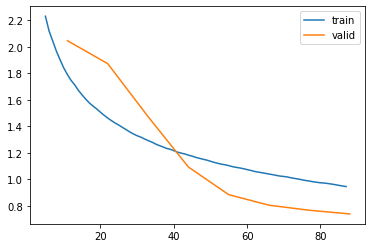

In [4]:
model = simple_cnn()
learn = Learner(databunch, model, metrics=accuracy)
learn.fit(8)
learn.recorder.plot_loss()

## Input mixup

epoch,train_loss,valid_loss,accuracy,time
0,1.571422,1.890785,0.845494,00:00
1,1.350072,1.582092,0.869814,00:00
2,1.240590,1.203414,0.914163,00:00
3,1.172084,0.960217,0.934192,00:00
4,1.120433,0.845528,0.937053,00:00
5,1.079358,0.800964,0.937053,00:00
6,1.042786,0.777282,0.947067,00:00
7,1.012001,0.750374,0.952790,00:00


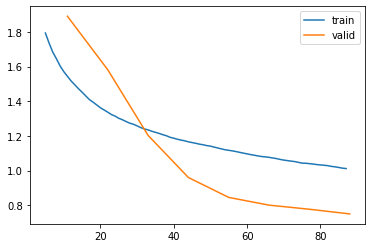

In [5]:
model = simple_cnn()
learn = Learner(databunch, model, metrics=accuracy, cbs=MixUp())
learn.fit(8)
learn.recorder.plot_loss()

## Manifold mixup

Manifold mixup: no known network structure detected, 8 modules will be used for mixup.


epoch,train_loss,valid_loss,accuracy,time
0,1.971205,1.984880,0.705293,00:00
1,1.590765,1.626929,0.862661,00:00
2,1.399710,1.200466,0.928469,00:00
3,1.280552,0.947566,0.948498,00:00
4,1.202680,0.811719,0.954220,00:00
5,1.142776,0.779640,0.962804,00:00
6,1.090889,0.749717,0.961373,00:00
7,1.051704,0.721244,0.962804,00:00


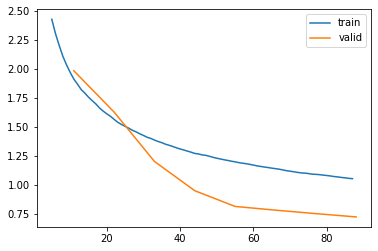

In [6]:
model = simple_cnn()
learn = Learner(databunch, model, metrics=accuracy, cbs=ManifoldMixUp())
learn.fit(8)
learn.recorder.plot_loss()

## Output mixup

epoch,train_loss,valid_loss,accuracy,time
0,1.859422,1.944881,0.128755,00:00
1,1.520740,1.787565,0.672389,00:00
2,1.364591,1.374058,0.881259,00:00
3,1.276682,1.058990,0.919886,00:00
4,1.208912,0.918274,0.929900,00:00
5,1.161194,0.863301,0.938484,00:00
6,1.114899,0.821267,0.938484,00:00
7,1.076704,0.792183,0.948498,00:00


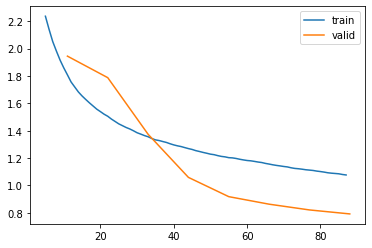

In [7]:
model = simple_cnn()
learn = Learner(databunch, model, metrics=accuracy).output_mixup() # notice that you can also use a method
learn.fit(8)
learn.recorder.plot_loss()